In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

sc.settings.verbosity = 3  

In [2]:
# fpath = "/scratch/indikar_root/indikar1/cstansbu/hematokytos/pretrained_embeddings/combat_adata.h5ad"
# fpath = "/scratch/indikar_root/indikar1/cstansbu/hematokytos/pretrained_embeddings/merged_adata.h5ad"
fpath = "/scratch/indikar_root/indikar1/cstansbu/hematokytos/finetuned_embeddings/merged_adata.h5ad"

adata = sc.read_h5ad(fpath)
adata.obs['UMAP 1'] = adata.obsm['X_umap'][:, 0]
adata.obs['UMAP 2'] = adata.obsm['X_umap'][:, 1]
sc.logging.print_memory_usage()
adata

Memory usage: current 0.90 GB, difference +0.90 GB


/home/cstansbu/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 171498 × 512
    obs: 'n_genes', 'dataset_x', 'n_genes_by_counts', 'total_counts', 'obs_index', 'cell_type', 'dataset_y', 'standard_cell_type', 'cell_id', 'input_ids', 'length', 'total_length', 'UMAP 1', 'UMAP 2'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

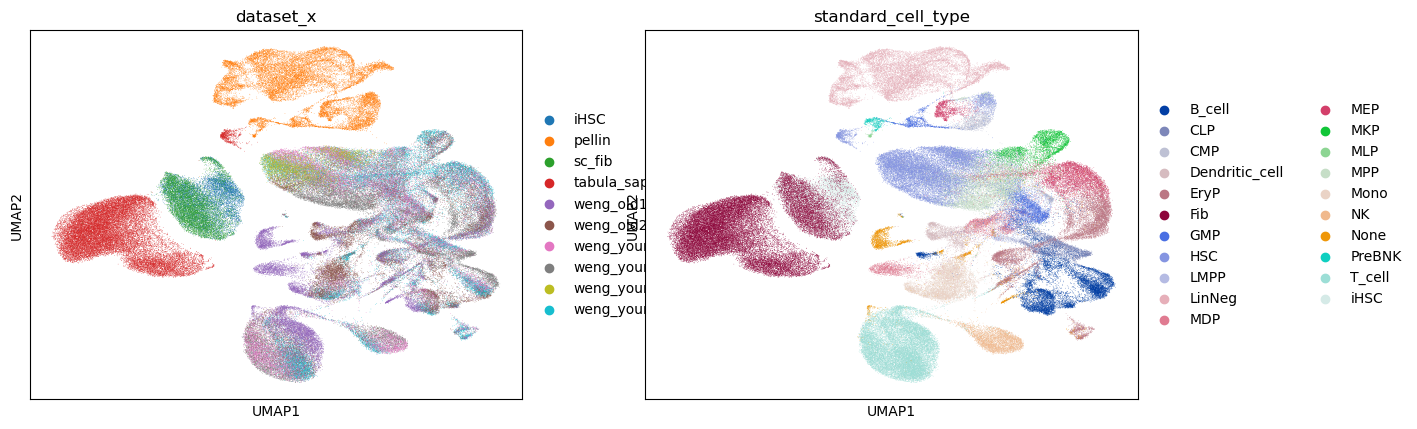

In [3]:
sc.pl.umap(
    adata,
    color=['dataset_x', 'standard_cell_type'],
)

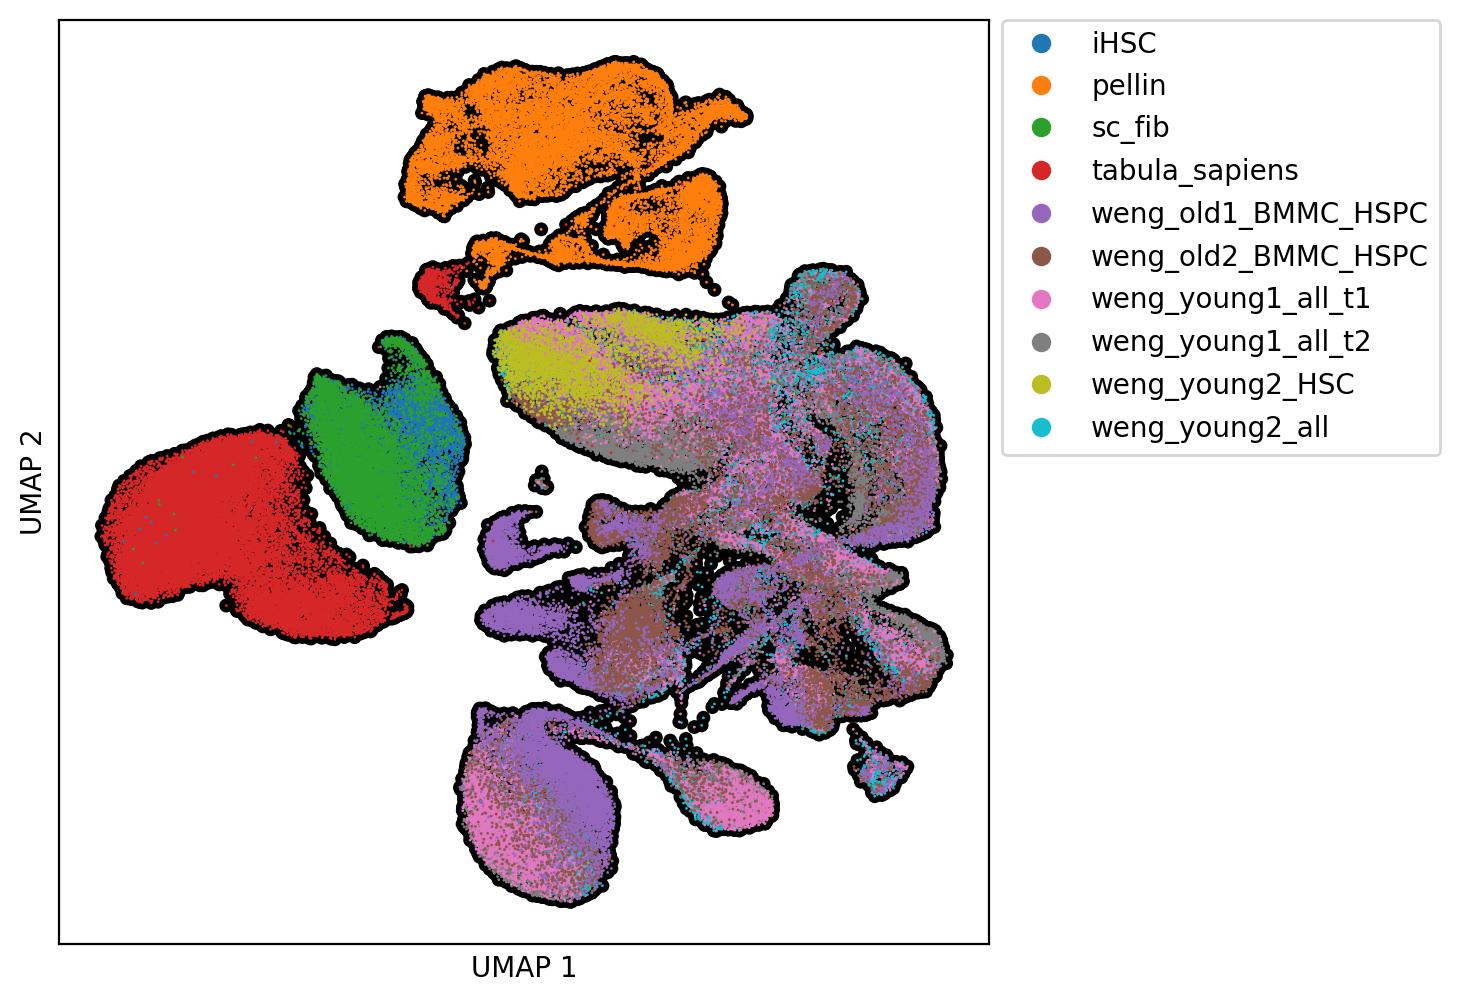

In [4]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6


sns.scatterplot(
    data=adata.obs,
    x='UMAP 1',
    y='UMAP 2',
    c='k',
    ec='none',
    s=25,
    zorder=1,
)

sns.scatterplot(
    data=adata.obs,
    x='UMAP 1',
    y='UMAP 2',
    hue='dataset_x',
    ec='none',
    s=1,
    zorder=2,
)

plt.xticks([])
plt.yticks([])

plt.gca().set_aspect('auto')

sns.move_legend(
    plt.gca(),
    loc='upper right',
    title="",
    bbox_to_anchor=(1.5, 1.015),
    markerscale=7,
)


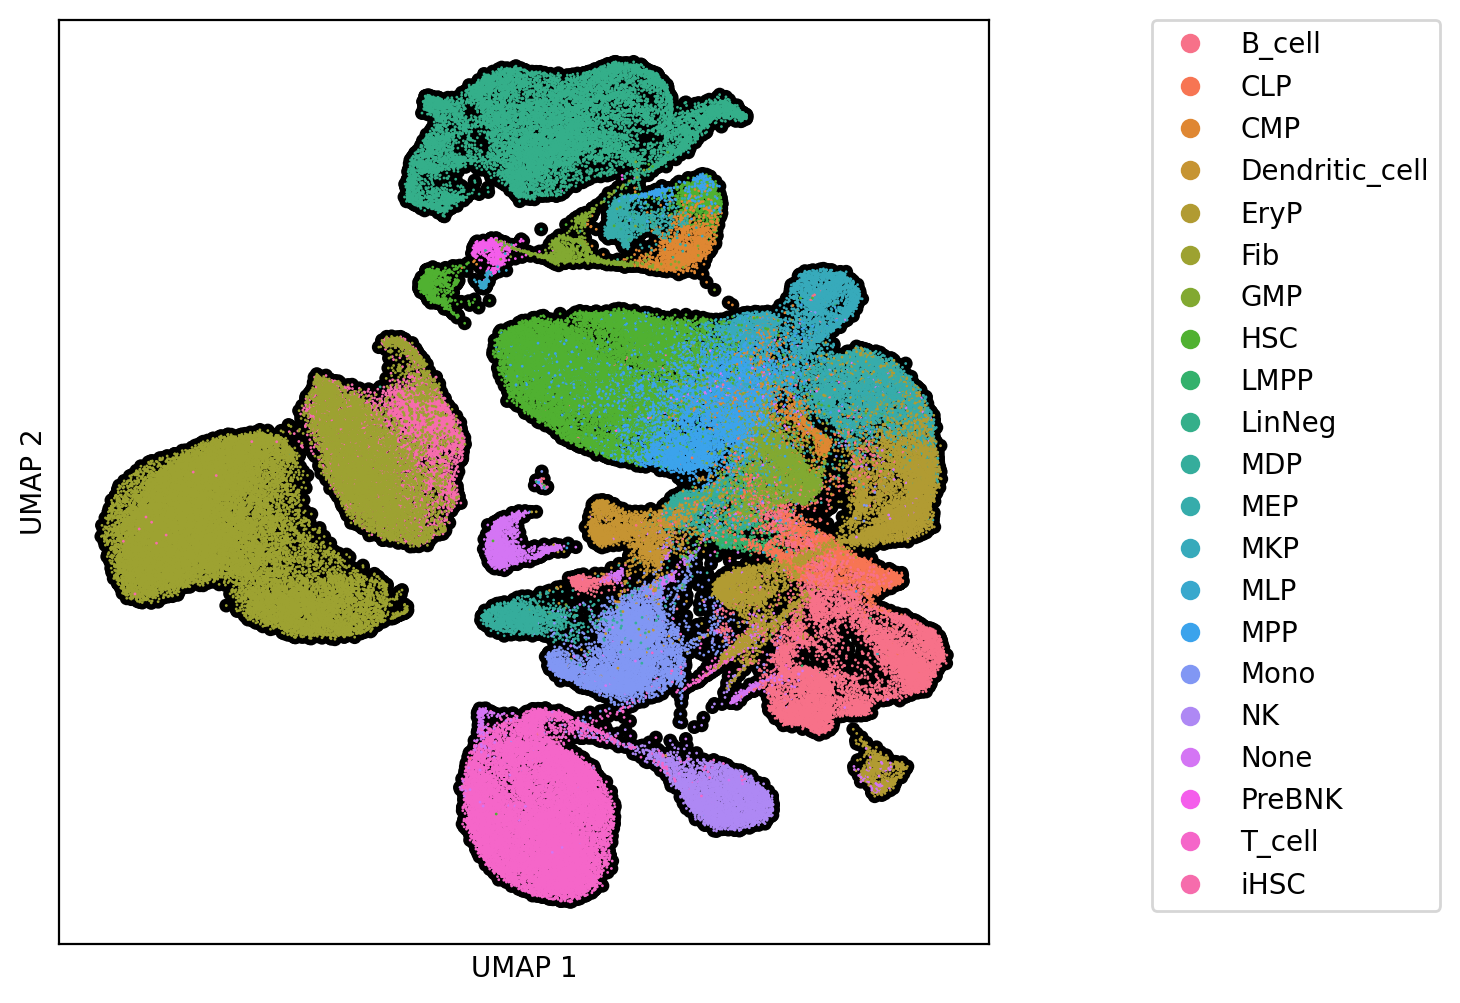

In [5]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 6, 6

sns.scatterplot(
    data=adata.obs,
    x='UMAP 1',
    y='UMAP 2',
    c='k',
    ec='none',
    s=25,
    zorder=1,
)

sns.scatterplot(
    data=adata.obs,
    x='UMAP 1',
    y='UMAP 2',
    hue='standard_cell_type',
    ec='none',
    s=1,
    zorder=2,
)

plt.xticks([])
plt.yticks([])

plt.gca().set_aspect('auto')

sns.move_legend(
    plt.gca(),
    loc='upper right',
    title="",
    bbox_to_anchor=(1.5, 1.015),
    markerscale=7,
)


In [6]:
# break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
n_trials = 1000
sample_size = 1000

result = []

for t in range(n_trials):
    dss = silhouette_score(
        adata.X, 
        adata.obs['dataset_x'],
        sample_size=sample_size,
    )

    css = silhouette_score(
        adata.X, 
        adata.obs['standard_cell_type'],
        sample_size=sample_size,
    )

    row = {
        'trial': t,
        'Dataset': dss,
        'Celltype': css,
    }

    result.append(row)

    # Print progress every 10 trials
    if (t + 1) % 100 == 0:
        print(f"Completed {t + 1} trials out of {n_trials}")

result = pd.DataFrame(result)
print("All trials completed. Displaying the first 5 rows:")
print(result.head())

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 3

sns.histplot(
    data=result.melt(id_vars='trial'),
    x='value',
    hue='variable',
    bins=31,
    kde=True,
)

plt.ylabel('Trials')
plt.xlabel('Silhouette Score')

sns.move_legend(
    plt.gca(),
    loc='best',
    title="",
)

sns.despine()

In [ ]:
for group_name, group in adata.obs.groupby('standard_cell_type', sort=False):
    print(group_name)
    
    cell_idx = group.index.astype(int)
    
    print(cell_idx[:10])
    
    break
    

In [ ]:
adata.obs.index[:10]

In [ ]:
# i = 4
# j = 5

# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = 6, 6

# sns.scatterplot(
#     data=adata.obs,
#     x=adata.obsm['X_pca'][:, i],
#     y=adata.obsm['X_pca'][:, j],
#     hue='standard_cell_type',
#     ec='none',
#     s=1,
#     zorder=2,
# )

# plt.xticks([])
# plt.yticks([])

# plt.gca().set_aspect('auto')

# sns.move_legend(
#     plt.gca(),
#     loc='upper right',
#     title="",
#     bbox_to_anchor=(1.5, 1.015),
#     markerscale=7,
# )

In [ ]:
break

In [ ]:
adata.obs.head()

In [ ]:
break